In [6]:
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


# Встановлюємо гіперпараметри:

In [7]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32


# Завантаження даних:

In [47]:
from keras.datasets import imdb

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів


# Опис датасету IMDB

Датасет IMDB являє собою набір відгуків про фільми з сайту Internet Movie Database (IMDB). 

1. Дані (`input`): Це послідовності індексів слів, що представляють тексти відгуків про фільми. Кожен елемент у датасеті являє собою один відгук. Наприклад, `train_data[0]` містить послідовність індексів для першого відгуку.
2. Мітки (`y`): Це бінарні значення (`0` або `1`), що представляють собою негативний або позитивний відгук. Наприклад, `train_labels[0]` містить мітку (`0` або `1`) для першого відгуку, вказуючи на те, негативний це відгук чи позитивний.

Приклади:

`train_data[0]`: `[1, 14, 22, 16, 43, ...]` (послідовність індексів слів першого відгуку)
train_labels[0]: 1 (мітка, що вказує на позитивний відгук)

Для декодування цих індексів назад у слова, можна використати словник `imdb.get_word_index()`, що надається `Keras`. 



## Розміри датасета


### Тренувальний датасет:
Розмір тренувальних даних: `(25000,)`
Розмір міток тренувальних даних: `(25000,)`

### Тестовий датасет:
Розмір тестових даних: `(25000,)`
Розмір міток тестових даних: `(25000,)`



In [81]:
# Декодуємо відгук


def decode_review(index):
    word_number = imdb.get_word_index()
    reverse_word_number = dict(
        [(value, key) for (key, value) in word_number.items()]
    )  # Змінюємо місцями ключ <-> значення

    # Використовуючи словник word_index декодуємо індекс в слово, якщо такого слова нема, підставляємо три точки ...
    decoded_review = " ".join(
        [reverse_word_number.get(i - 3, "...") for i in input_train[index]]
    )
    return decoded_review


In [82]:
index = 1
print(f"Відгук: {input_train[index]}")
print(f"Декодований: {decode_review(index)}")
print(f"Мітка: {y_train[index]}")


Відгук: [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Декодований: ... big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i'

# Передпроцесинг послідовних даних:

In [83]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів


# Побудова простої моделі RNN:

In [10]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


# Компіляція моделі:

In [13]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])


# Виведення опису моделі:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Навчання моделі:

In [15]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 19s 124ms/step - loss: 0.6473 - acc: 0.6030 - val_loss: 0.5825 - val_acc: 0.6865
Epoch 2/5
137/137 [==============================] - 21s 155ms/step - loss: 0.4297 - acc: 0.8132 - val_loss: 0.3893 - val_acc: 0.8321
Epoch 3/5
137/137 [==============================] - 19s 140ms/step - loss: 0.3214 - acc: 0.8693 - val_loss: 0.4208 - val_acc: 0.8209
Epoch 4/5
137/137 [==============================] - 16s 116ms/step - loss: 0.2701 - acc: 0.8934 - val_loss: 0.3775 - val_acc: 0.8340
Epoch 5/5
137/137 [==============================] - 18s 134ms/step - loss: 0.2146 - acc: 0.9192 - val_loss: 0.4108 - val_acc: 0.8255


# Відображення результатів:

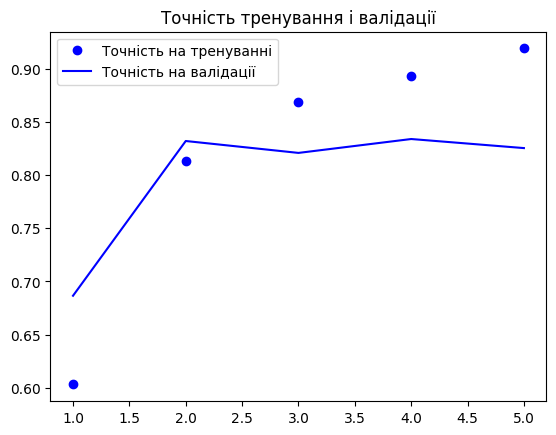

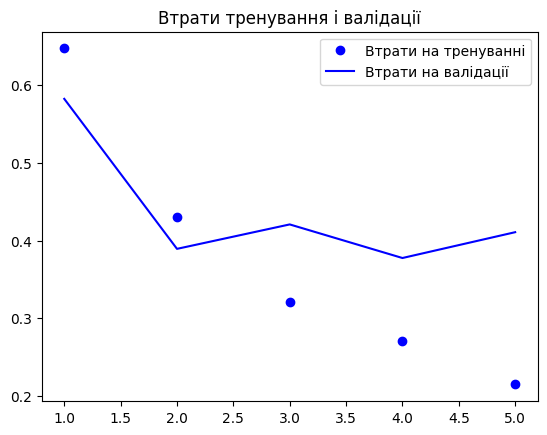

In [17]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


# Прогнозування з використанням навченої моделі:

In [18]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))


782/782 [==============================] - 14s 18ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 15s 20ms/step - loss: 0.4018 - acc: 0.8286
Test Loss: 0.40184125304222107
Test Accuracy: 0.8286399841308594
